<a href="https://colab.research.google.com/github/Noctua28/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

Aharon Brenes Fallas

#Project Overview

#Data Dictionary

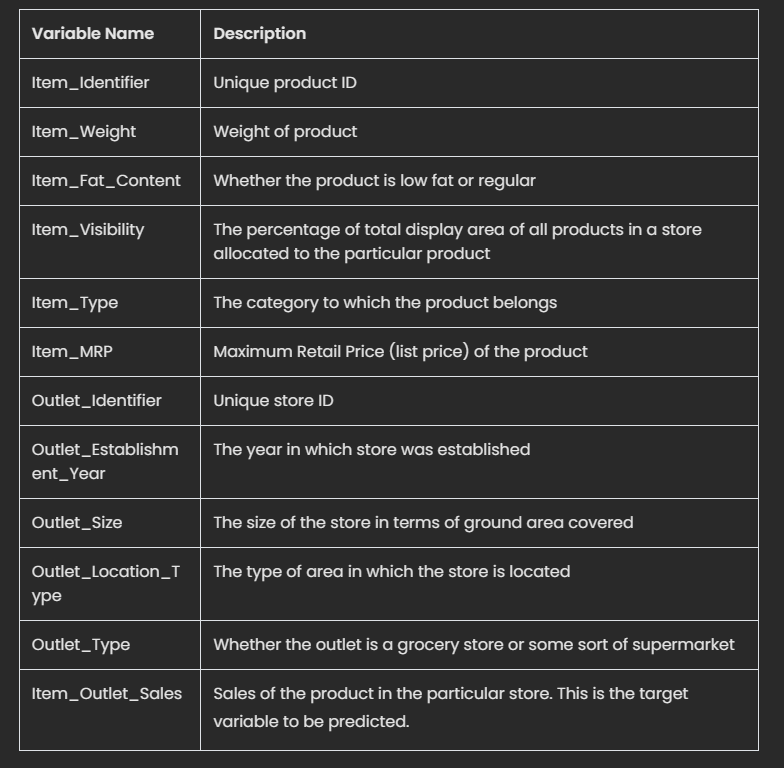

# Load and Inspect Data

In [2]:
import pandas as pd
sales_predictions_df=pd.read_csv('/content/drive/MyDrive/Data Science Boot Camp/02 Week 2: Pandas/sales_predictions.csv')
sales_predictions_df.info()
sales_predictions_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Clean Data

In [3]:
#How many Rows and Colums?
sales_predictions_df.shape


(8523, 12)

We have 8523 rows and 12 columns

In [4]:
#What are the datatypes of each variable?
sales_predictions_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

We find variables with the following datatypes:

- object 
- float64
- int64





In [5]:
#Are there any duplicates? 
sales_predictions_df.duplicated().sum()

0

There are no duplicates.

In [6]:
#Are there missing values?
sales_predictions_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- We have a total of 1463 missing values in 'Item_Weight'
- We have a total of 2410 missing values in 'Outlet_Size'



In [7]:
#Addressing Missing Values
mean_item_weight = sales_predictions_df['Item_Weight'].mean()
sales_predictions_df['Item_Weight'] = sales_predictions_df['Item_Weight'].fillna(mean_item_weight)
data_filling_mode = sales_predictions_df['Outlet_Size'].mode()[0]
sales_predictions_df['Outlet_Size'] = sales_predictions_df['Outlet_Size'].fillna(data_filling_mode)

I have decided to use the mean to fill the missing values in 'Item_Weight' as these are numerical and the mode for 'Outlet_size' as these are non-numeric values.

In [8]:
#Confirming missing values are filled
missing_values = sales_predictions_df.isnull().sum
print(missing_values)

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               False        False             False            False   
1               False        False             False            False   
2               False        False             False            False   
3               False        False             False            False   
4               False        False             False            False   
...               ...          ...               ...              ...   
8518            False        False             False            False   
8519            False        False             False            False   
8520            False        False             False            False   
8521            False        False             False            False   
8522            False        False             False            False   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establis

I have confirmed that there are no missing values. No result returned as 'True'

In [9]:
#Identifying and Fixing Inconsistent Categories 
for col in sales_predictions_df.columns:
  if sales_predictions_df[col].dtype =='object':
    print(sales_predictions_df[col].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    520

I have identified inconsistencies in 'Item_Fat_Content' with 'LF' also used to express "Low Fat" and 'Reg' to express "Regular" 

In [10]:
#Fixing Inconsistencies
sales_predictions_df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular' },inplace=True)

In [11]:
#Verifying Resolution 
print(sales_predictions_df['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [12]:
#Obtaining the summary statistics of each numerical column
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
sales_predictions_df[numerical_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis

In [14]:
#Importing to additional libraries to dive deeper into data analysis through visualizations
import matplotlib.pyplot as plt
import seaborn as sns

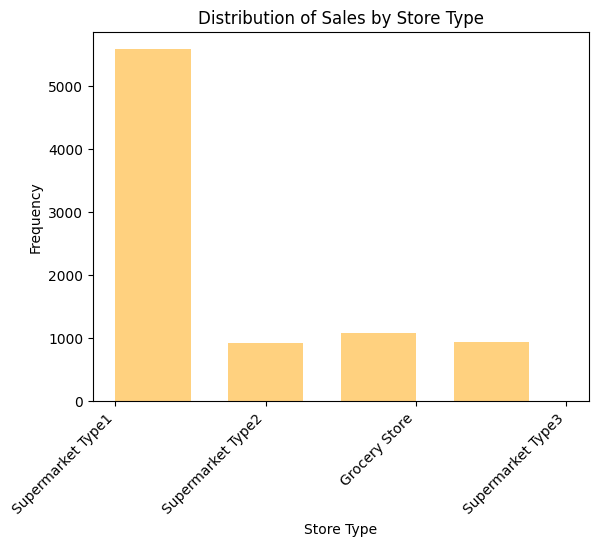

In [28]:
#Creating a histogram to analyze the distribution of sales by store type. This can help us identify any patterns or trends in the sales data that are associate with the different store types. 

plt.hist(sales_predictions_df['Outlet_Type'], bins=4, alpha=0.5, label = 'Sakes by Store Type', width=0.5, color='orange')
plt.title('Distribution of Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Frequency')
#adding code to fix label overlapping each other
plt.xticks(rotation=45, ha='right')
plt.show()
#Through this historgram we see by analyzing the distribution of sales across different store types that we can gain insight into which store types are most successful and potentially identify areas for improvement in stores that are underperforming.
#This histogram can help us provide valuable insights into the performance of each store type and help inform decision-making for marketing and sales strategies. 

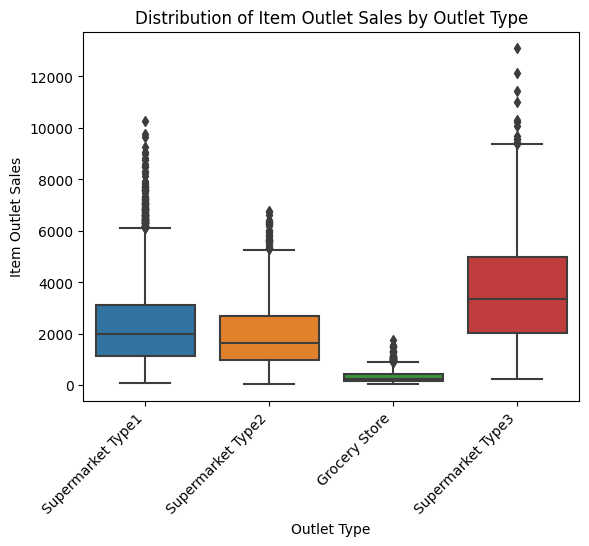

In [31]:
#Creating a boxplot to analyze the distribution of Outlet sales for Outlet type. Thiss can help us identify any differences or similarities in sales performance across different types of outlets. 
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=sales_predictions_df)
plt.title('Distribution of Item Outlet Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
#Adding code so labels don't overlap one another
plt.xticks(rotation=45, ha='right')
plt.show()

# Explanatory Data Analysis

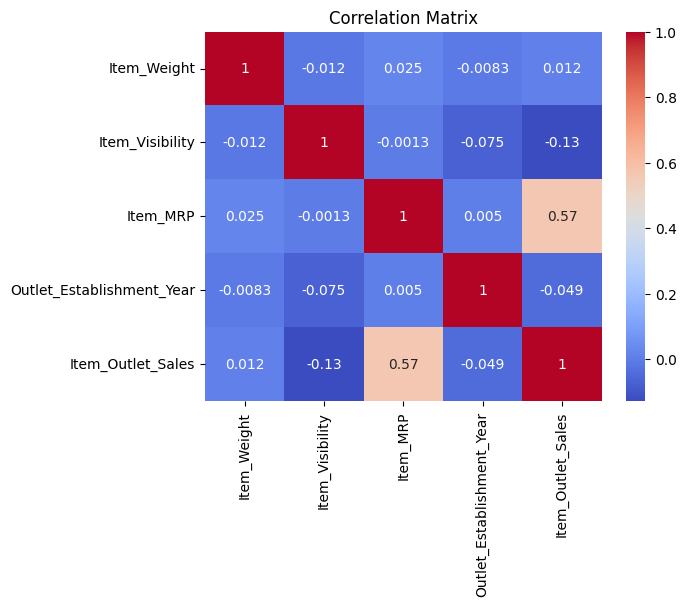

In [35]:
#Creating a heatmap to help identify any strong positive or negative relationships between variables, which can be useful for feature selection or identifying potential areas for further analysis. 
corr_matrix = sales_predictions_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#By analyzing the heatmap, we can gain insight into the relationship between different variables. 
#We can see a strong positive correlation between the MRP and Outlet Sales, indicating that the higher the MRP values are associated with higher Outlet Sales. 
#We can also see that there is a negative correlation between Item Visibility and Outlet Sales, indicating that high Item Visibility values are associated with lower Outlet Sales. 
#The hearmap can provide valuable insights to help inform decision-making for feature selection or further analysis. 